# useful_wsi package

In [1]:
%matplotlib inline

import matplotlib.pylab as plt
from useful_wsi import get_whole_image, get_image, white_percentage
from useful_wsi import patch_sampling, visualise_cut, roi_binary_mask

def check_for_white(img):
    """
    Checking for white
    220 is the threshold
    0.8 is the tolerance level
    """
    return white_percentage(img, 220, 0.8)


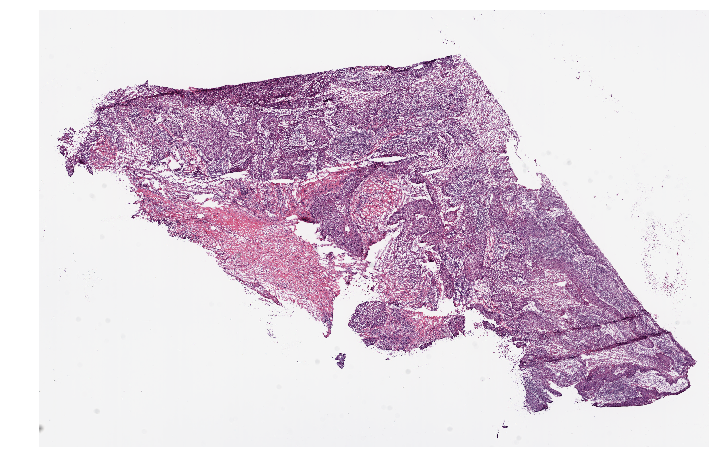

In [2]:
image = "TCGA-CN-4739-01A-02-BS2.fc87f5db-d311-4734-a200-7c7d4885b274.svs"
slide = get_whole_image(image)
plt.figure(figsize=(12,12))
plt.imshow(slide)
plt.axis('off')
plt.show()

## 1 -Grid

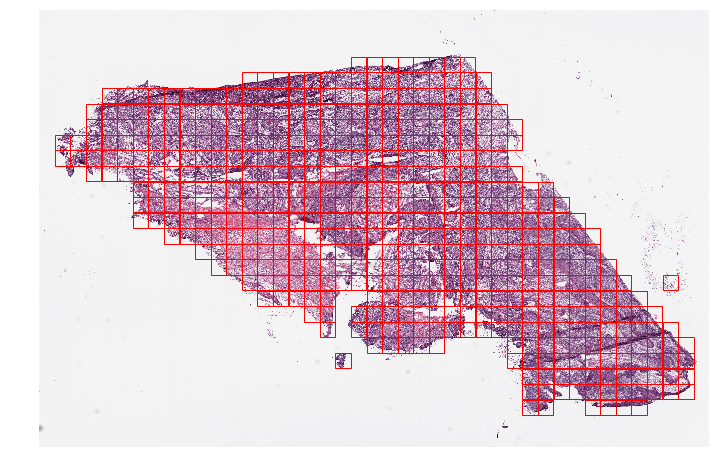

We have so many patches 505.


In [3]:

## Options regarding the mask creationg, which level to apply the function.
options_applying_mask = {'mask_level': 2, 'mask_function': roi_binary_mask}

## Options regarding the sampling. Method, level, size, if overlapping or not.
## You can even use custom functions. Tolerance for the mask segmentation.
## allow overlapping is for when the patch doesn't fit in the image, do you want it?
## n_samples and with replacement are for the methods random_patch
options_sampling = {'sampling_method': "grid", 'analyse_level': 0, 'patch_size': (512, 512),
                    'overlapping': 0, 'list_func': [check_for_white], 'mask_tolerance': 0.3,
                    'allow_overlapping': False, 'n_samples': 100, 'with_replacement': False}
roi_options = dict(options_applying_mask, **options_sampling)
list_roi = patch_sampling(image, **roi_options)
visualise_cut(image, list_roi)
print('We have so many patches {}.'.format(len(list_roi)))

## 2 -One random patches

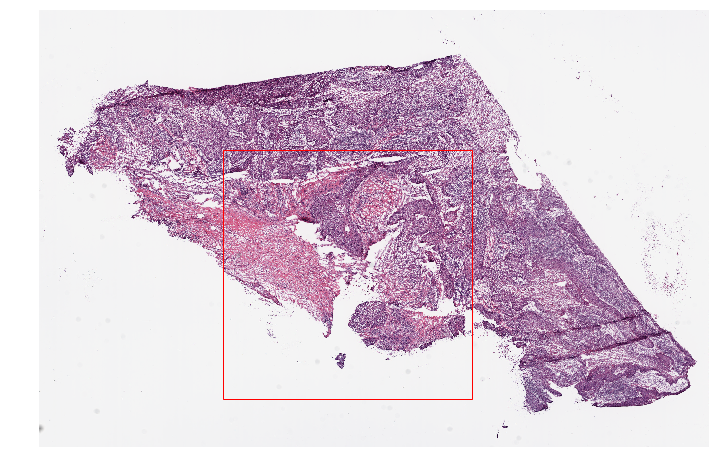

We have not so many patches 1...


In [4]:

## Options regarding the mask creationg, which level to apply the function.
options_applying_mask = {'mask_level': 2, 'mask_function': roi_binary_mask}

## Options regarding the sampling. Method, level, size, if overlapping or not.
## You can even use custom functions. Tolerance for the mask segmentation.
## allow overlapping is for when the patch doesn't fit in the image, do you want it?
## n_samples and with replacement are for the methods random_patch
options_sampling = {'sampling_method': "random_patches", 'analyse_level': 1, 'patch_size': (512, 512),
                    'overlapping': 0, 'list_func': [check_for_white], 'mask_tolerance': 0.3,
                    'allow_overlapping': False, 'n_samples': 1, 'with_replacement': False}
roi_options = dict(options_applying_mask, **options_sampling)
list_roi = patch_sampling(image, seed=123, **roi_options)
visualise_cut(image, list_roi)
print('We have not so many patches {}...'.format(len(list_roi)))

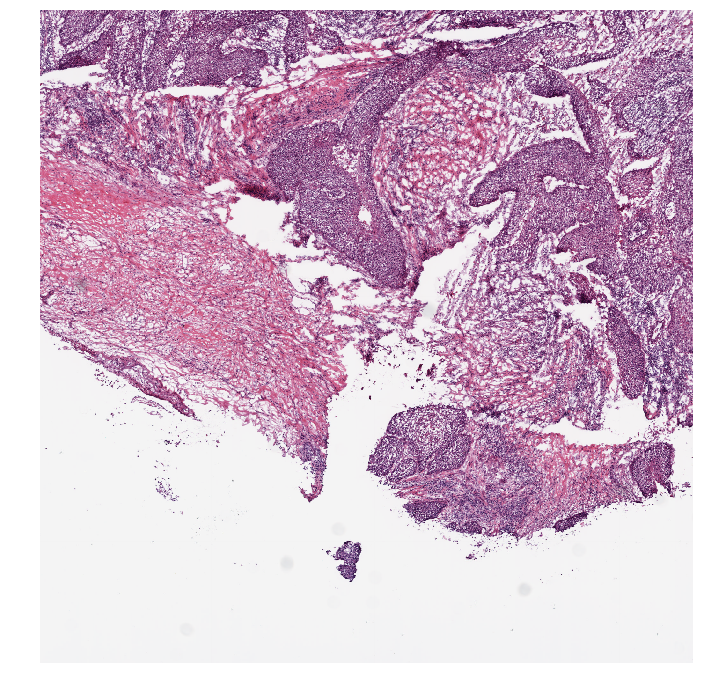

In [5]:
sub_img = get_image(image, list_roi[0])

plt.figure(figsize=(12,12))
plt.imshow(sub_img)
plt.axis('off')
plt.show()

## 3 -One random patches

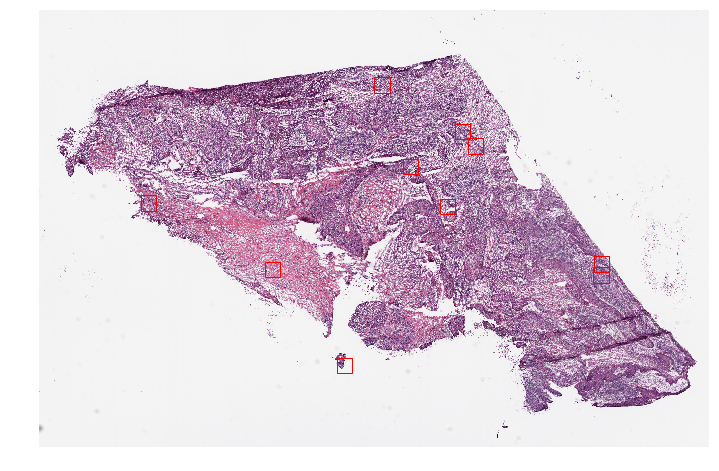

We have not so many patches 10...


In [6]:

## Options regarding the mask creationg, which level to apply the function.
options_applying_mask = {'mask_level': 2, 'mask_function': roi_binary_mask}

## Options regarding the sampling. Method, level, size, if overlapping or not.
## You can even use custom functions. Tolerance for the mask segmentation.
## allow overlapping is for when the patch doesn't fit in the image, do you want it?
## n_samples and with replacement are for the methods random_patch
options_sampling = {'sampling_method': "random_patches", 'analyse_level': 0, 'patch_size': (512, 512),
                    'overlapping': 0, 'list_func': [check_for_white], 'mask_tolerance': 0.3,
                    'allow_overlapping': False, 'n_samples': 10, 'with_replacement': False}
roi_options = dict(options_applying_mask, **options_sampling)
list_roi = patch_sampling(image, **roi_options)
visualise_cut(image, list_roi)

print('We have not so many patches {}...'.format(len(list_roi)))

# 4 - With your own tensorflow classifier